# Practical Essay: Implementing Data Science in Marketing Analytics for an E-commerce Website Using Python and Pandas.

## Introduction

In the rapidly evolving landscape of e-commerce, understanding customer behavior, preferences, and trends is crucial for effective marketing strategies. Data science, with its robust analytical capabilities, offers powerful tools for deriving insights from complex datasets. This essay outlines ten practical tasks in the marketing analytics domain, specifically focusing on an e-commerce website. Each task will leverage Python and the Pandas library to perform essential activities such as Exploratory Data Analysis (EDA), funnel analysis, user traceability, and more.


## Task 0: Data Ingestion and Preprocessing

The first step in any data analysis project is to ingest and preprocess the data. This involves loading data from various sources, handling missing values, and ensuring the data is clean and consistent.


In [1]:
import pandas as pd

# Sociodemographics data
users = pd.read_parquet("data/sociodemographics/users.parquet")
population_demographics = pd.read_csv("data/DECENNIALCD1182020.P9-Data.csv")

# Funnel analysis data
account_initial_funding = pd.read_parquet("data/funnel/account_initial_funding.parquet")
bank_connected = pd.read_parquet("data/funnel/bank_connected.parquet")
deposit_setup = pd.read_parquet("data/funnel/deposit_setup.parquet")
emma_answered = pd.read_parquet("data/funnel/emma_answered.parquet")
emma_completed = pd.read_parquet("data/funnel/emma_completed.parquet")
identity_completed = pd.read_parquet("data/funnel/identity_completed.parquet")
soft_lead = pd.read_parquet("data/funnel/soft_lead.parquet")
suscription_event = pd.read_parquet("data/funnel/suscription_event.parquet")

# Deposits data
deposit_receive = pd.read_csv("data/deposits/deposit_received_6m.csv")
deposit_processed = pd.read_csv("data/deposits/deposit_processed_6m.csv")
deposit_bounced = pd.read_csv("data/deposits/deposit_bounced_6m.csv")

In [2]:
population_demographics = pd.read_csv("data/DECENNIALCD1182020.P9-Data.csv")
population_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEO_ID       53 non-null     object 
 1   NAME         53 non-null     object 
 2   P9_001N      53 non-null     object 
 3   P9_002N      53 non-null     object 
 4   P9_003N      53 non-null     object 
 5   P9_004N      53 non-null     object 
 6   P9_005N      53 non-null     object 
 7   P9_006N      53 non-null     object 
 8   P9_007N      53 non-null     object 
 9   P9_008N      53 non-null     object 
 10  P9_009N      53 non-null     object 
 11  P9_010N      53 non-null     object 
 12  P9_011N      53 non-null     object 
 13  P9_012N      53 non-null     object 
 14  P9_013N      53 non-null     object 
 15  P9_014N      53 non-null     object 
 16  P9_015N      53 non-null     object 
 17  P9_016N      53 non-null     object 
 18  P9_017N      53 non-null     object 
 19  P9_018N   

In [3]:
population_demographics.head(10)

GEO_ID                  NAME    P9_001N  \
0    Geography  Geographic Area Name   !!Total:   
1  0400000US01               Alabama    5024279   
2  0400000US02                Alaska     733391   
3  0400000US04               Arizona    7151502   
4  0400000US05              Arkansas    3011524   
5  0400000US06            California   39538223   
6  0400000US08              Colorado    5773714   
7  0400000US09           Connecticut    3605944   
8  0400000US10              Delaware     989948   
9  0400000US11  District of Columbia     689545   

                         P9_002N                             P9_003N  \
0   !!Total:!!Hispanic or Latino   !!Total:!!Not Hispanic or Latino:   
1                         264047                             4760232   
2                          49824                              683567   
3                        2192253                             4959249   
4                         256847                             2754677   
5                       15579652                            23958571   
6                        1263390                             4510324   
7                         623293                             2982651   
8                         104290                              885658   
9                          77652                              611893   

                                             P9_004N  \
0   !!Total:!!Not Hispanic or Latino:!!Population...   
1                                            4575614   
2                                             611806   
3                                            4692409   
4                                            2607520   
5                                           22330849   
6                                            4249526   
7                                            2845082   
8                                             842635   
9                                             582408   

                                             P9_005N  \
0   !!Total:!!Not Hispanic or Latino:!!Population...   
1                                            3171351   
2                                             421758   
3                                            3816547   
4                                            2063550   
5                                           13714587   
6                                            3760663   
7                                            2279232   
8                                             579851   
9                                             261771   

                                             P9_006N  \
0   !!Total:!!Not Hispanic or Latino:!!Population...   
1                                            1288159   
2                                              20731   
3                                             317161   
4                                             449884   
5                                            2119286   
6                                             221310   
7                                             360937   
8                                             212960   
9                                             282066   

                                             P9_007N  \
0   !!Total:!!Not Hispanic or Latino:!!Population...   
1                                              23119   
2                                             108838   
3                                             263930   
4                                              20549   
5                                             156085   
6                                              33768   
7                                               6404   
8                                               2521   
9                                               1277   

                                             P9_008N  ...  \
0   !!Total:!!Not Hispanic or Latino:!!Population...  ...   
1                                              75918  ...   
2 

In [19]:
population_latinos = population_demographics[['NAME','P9_001N', 'P9_002N', 'P9_003N']]


population_latinos.columns = population_latinos.iloc[0]
population_latinos = population_latinos.iloc[1:].reset_index(drop=True)
population_latinos.rename(columns={'Geographic Area Name': 'State',
                                  ' !!Total:': 'Total',
                                  ' !!Total:!!Hispanic or Latino': 'Hispanic or Latino',
                                  ' !!Total:!!Not Hispanic or Latino:': 'Not Hispanic or Latino'}, inplace=True)
# Convertir columnas numericas de string a entero
population_latinos[['Total', 'Hispanic or Latino', 'Not Hispanic or Latino']] = population_latinos[['Total', 'Hispanic or Latino', 'Not Hispanic or Latino']].astype(int)

population_latinos.head(10)

0                 State     Total  Hispanic or Latino  Not Hispanic or Latino
0               Alabama   5024279              264047                 4760232
1                Alaska    733391               49824                  683567
2               Arizona   7151502             2192253                 4959249
3              Arkansas   3011524              256847                 2754677
4            California  39538223            15579652                23958571
5              Colorado   5773714             1263390                 4510324
6           Connecticut   3605944              623293                 2982651
7              Delaware    989948              104290                  885658
8  District of Columbia    689545               77652                  611893
9               Florida  21538187             5697240                15840947

In [5]:
users.head(10)

sponsor agent                           email firstName  lastName  gender  \
0    None  None             admin@finhabits.com     admin     admin    None   
1    None  None            carlos@finhabits.com       App    Review    MALE   
2    None  None         saul.cortinas@gmail.com      None      None    None   
3    None  None         ymahnanscombe@yahoo.com     Ymahn  Anscombe  FEMALE   
4    None  None  garcia.carlosarmando@gmail.com  Carlos A    Garcia    MALE   
5    None  None       itsoliviadoe666@gmail.com    Olivia    Hughes  FEMALE   
6    None  None         jeaguilar.m10@gmail.com      None      None    None   
7    None  None            adrians_98@yahoo.com    Adrian     Solis    MALE   
8    None  None              boomer23bb@aol.com    Leslie      Behm  FEMALE   
9    None  None          marioaporras@gmail.com     Mario    Porras    MALE   

            dateOfBirth legalStatus maritalStatus                address1  \
0                  None        None          None                    None   
1  1970-01-01T00:00:00Z       OTHER        SINGLE         1 Infinite Loop   
2                  None        None          None                    None   
3  1995-01-25T00:00:00Z  US_CITIZEN        SINGLE    8 Saint Williams Way   
4  1980-01-24T00:00:00Z  US_CITIZEN       MARRIED             166 Bank St   
5  1997-12-28T00:00:00Z  US_CITIZEN        SINGLE        5322 cerro vista   
6                  None        None          None                    None   
7  1998-03-13T00:00:00Z  US_CITIZEN        SINGLE  1107 Flagstone Terrace   
8  1965-11-23T00:00:00Z  US_CITIZEN        SINGLE     510 Us Highway 27 N   
9  1981-05-23T00:00:00Z  US_CITIZEN       MARRIED    6475 Snowheighths Ct   

   ...       nextBillingDate feeDiscount previousBillingFeeType  \
0  ...                  None         NaN                   None   
1  ...                  None         NaN                   None   
2  ...                  None         NaN                   None   
3  ...                  None         NaN                   None   
4  ...  2024-05-31T12:00:00Z         1.0                    AUM   
5  ...                  None         NaN                   None   
6  ...                  None         NaN                   None   
7  ...                  None         NaN                   None   
8  ...                  None         NaN                   None   
9  ...  2024-05-31T12:00:00Z         0.0  PLATFORM_SUBSCRIPTION   

  paymentMethodStatus paymentMethodType paymentMethodSubType  \
0                None              None                 None   
1                None              None                 None   
2                None              None                 None   
3                None              None                 None   
4              ACTIVE      BANK_ACCOUNT             CHECKING   
5                None              None                 None   
6                None              None                 None   
7                None              None                 None   
8                None              None                 None   
9               ERROR      BANK_ACCOUNT             CHECKING   

   paymentMethodExpiration paymentMethodLastFour  paymentMethodBrand  \
0                     None                   NaN                None   
1                     None                   NaN                None   
2                     None                   NaN                None   
3                     None                   NaN                None   
4                     None                6197.0                None   
5                     None                   NaN                None   
6                     None                   NaN                None   
7                     None                   NaN                None   
8                     None                   NaN                None   
9                     None                   0.0                None   

                goalStatus  
0                  

## Task 1: Exploratory Data Analysis (EDA)

EDA helps in understanding the data's underlying patterns, distributions, and anomalies. It is the foundation for more complex analyses.


C:\Users\alanr\AppData\Local\Temp\ipykernel_25144\3680494469.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm, orientation='horizontal', pad=0.05, aspect=50)


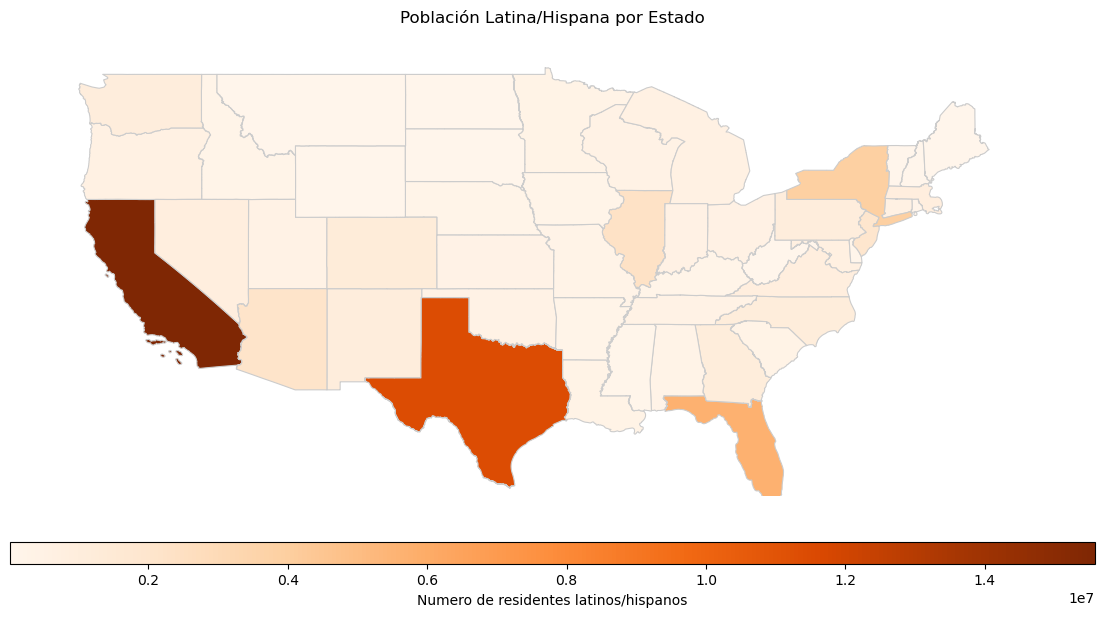

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
usa = gpd.read_file("tl_2023_us_state/tl_2023_us_state.shp")
merged = usa.set_index('NAME').join(population_latinos.set_index('State'))

# Calcular las dimensiones para poder modificar la gráfica
minx, miny, maxx, maxy = merged.total_bounds

# Mapa de calor
fig, ax = plt.subplots(figsize=(14, 12))
merged.plot(column='Hispanic or Latino', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
ax.set_xlim(minx+50, maxx-240)
ax.set_ylim(miny+40, maxy-20)
ax.set_title('Población Latina/Hispana por Estado')

#Barra de color
ax.axis('off')
norm = mcolors.Normalize(vmin=merged['Hispanic or Latino'].min(), vmax=merged['Hispanic or Latino'].max())
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Numero de residentes latinos/hispanos')
plt.show()

In [7]:
population_latinos.sort_values(by='Hispanic or Latino', ascending=False)

0                  State     Total  Hispanic or Latino  Not Hispanic or Latino
4             California  39538223            15579652                23958571
43                 Texas  29145505            11441717                17703788
9                Florida  21538187             5697240                15840947
32              New York  20201249             3948032                16253217
51           Puerto Rico   3285874             3249043                   36831
13              Illinois  12812508             2337410                10475098
2                Arizona   7151502             2192253                 4959249
30            New Jersey   9288994             2002575                 7286419
5               Colorado   5773714             1263390                 4510324
10               Georgia  10711908             1123457                 9588451
33        North Carolina  10439388             1118596                 9320792
47            Washington   7705281             1059213                 6646068
38          Pennsylvania  13002700             1049615                11953085
31            New Mexico   2117522             1010811                 1106711
46              Virginia   8631393              908749                 7722644
28                Nevada   3104614              890257                 2214357
21         Massachusetts   7029917              887685                 6142232
20              Maryland   6177224              729745                 5447479
6            Connecticut   3605944              623293                 2982651
37                Oregon   4237256              588757                 3648499
22              Michigan  10077331              564422                 9512909
14               Indiana   6785528              554191                 6231337
35                  Ohio  11799448              521308                11278140
44                  Utah   3271616              492912                 2778704
42             Tennessee   6910840              479187                 6431653
36              Oklahoma   3959353              471931                 3487422
49             Wisconsin   5893718              447290                 5446428
16                Kansas   2937880              382603                 2555277
40        South Carolina   5118425              352838                 4765587
23             Minnesota   5706494              345640                 5360854
18             Louisiana   4657757              322549                 4335208
25              Missouri   6154913              303068                 5851845
0                Alabama   5024279              264047                 4760232
3               Arkansas   3011524              256847                 2754677
12                 Idaho   1839106              239407                 1599699
27              Nebraska   1961504              234715                 1726789
15                  Iowa   3190369              215986                 2974383
17              Kentucky   4505836              207854                 4297982
39          Rhode Island   1097379              182101                  915278
11                Hawaii   1455271              138923                 1316348
24           Mississippi   2961279              105220                 2856059
7               Delaware    989948              104290                  885658
8   District of Columbia    689545               77652                  611893
29         New Hampshire   1377529               59454                 1318075
50               Wyoming    576851               59046                  517805
1                 Alaska    733391               49824                  683567
26               Montana   1084225               45199                 1039026
41          South Dakota    886667               38741                  847926
48         West Virginia   1793716               34827                 1758889
34          North Dakota    779094               3

In [8]:
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado',
    'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico', 'VI': 'Virgin Islands',
    'GU': 'Guam', 'MP': 'Northern Mariana Islands', 'AS': 'American Samoa', 'UM': 'United States Minor Outlying Islands',
    'DC': 'District of Columbia'
}

# Map the abbreviated state names in the 'state' column to their full names
users['state'] = users['state'].map(state_mapping)
users['state'].value_counts()

California                              92432
Texas                                   68792
Florida                                 64949
New York                                50194
New Jersey                              29205
Puerto Rico                             29141
Illinois                                20834
Georgia                                 14985
North Carolina                          13007
Maryland                                12770
Virginia                                11867
Pennsylvania                            10276
Massachusetts                           10189
Arizona                                  9818
Colorado                                 8412
Washington                               8216
Nevada                                   7276
Connecticut                              7180
Tennessee                                6116
Indiana                                  5918
Utah                                     5351
South Carolina                    

C:\Users\alanr\AppData\Local\Temp\ipykernel_25144\1234093355.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


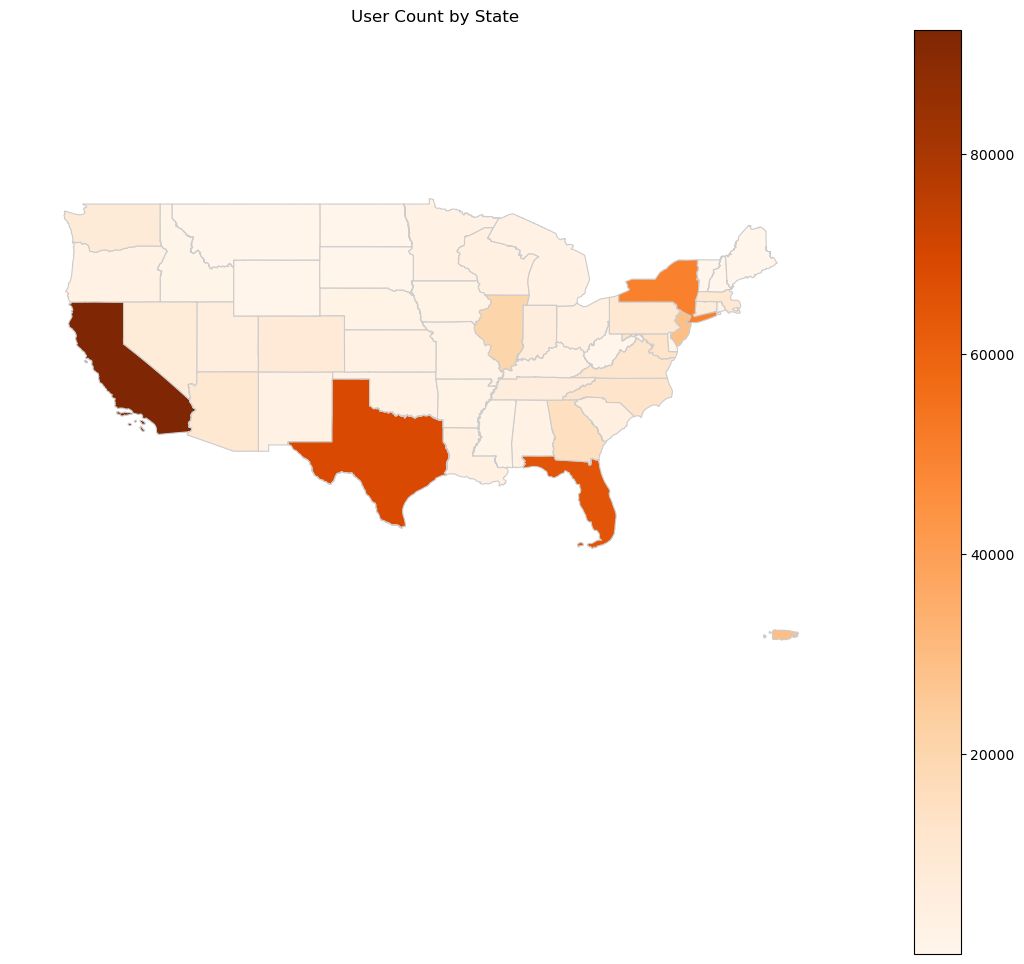

In [9]:
user_counts = users['state'].value_counts().reset_index()
user_counts.columns = ['State', 'User_Count']

# Load the USA states GeoDataFrame
usa = gpd.read_file("tl_2023_us_state/tl_2023_us_state.shp")

# Merge the USA states GeoDataFrame with the user_counts DataFrame
merged = usa.set_index('NAME').join(user_counts.set_index('State'))

# Calculate the dimensions to modify the plot
minx, miny, maxx, maxy = merged.total_bounds

# Create the heatmap
fig, ax = plt.subplots(figsize=(14, 12))
merged.plot(column='User_Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

# Set limits to only show the USA
ax.set_xlim(minx + 50, maxx - 240)
ax.set_ylim(miny + 10, maxy - 10)

# Set title
ax.set_title('User Count by State')

# Color bar
ax.axis('off')
norm = mcolors.Normalize(vmin=merged['User_Count'].min(), vmax=merged['User_Count'].max())
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm._A = []
cbar = fig.colorbar(sm)
plt.show()

In [10]:
deposit_processed = pd.read_csv("data/deposits/deposit_processed_6m.csv")
deposit_processed.head()

UserId.S Goal.M.AccountNumber.S                   EventDateTime.S  \
0     45896               8BL64509  2023-09-01 09:16:21.755000+00:00   
1    224583               8BL82906  2023-09-01 09:16:25.877000+00:00   
2    228765               8BL83735  2023-09-01 09:16:27.881000+00:00   
3    476456               8IA40856  2023-09-01 09:16:29.788000+00:00   
4    561143               8IA55431  2023-09-01 09:16:31.351000+00:00   

           EventType                           DepositId.S  Amount.S  \
0  DEPOSIT_PROCESSED  3f42c640-dd2f-4c47-85ec-693f7e548837        25   
1  DEPOSIT_PROCESSED  f102c85a-4beb-4dfa-ae7d-2955baf7d40b       100   
2  DEPOSIT_PROCESSED  6a91b7d0-4d71-401a-a037-8b06d1f55ed5        60   
3  DEPOSIT_PROCESSED  7e191ab9-e3ef-4d96-91be-203f2f950e5c      1000   
4  DEPOSIT_PROCESSED  6321ad10-ff2b-4203-821c-cc3861714de2        50   

   Goal.Balance.N  ReturnPredictionScore DepositType.S BankType.S  \
0          726.16               0.990099        MANUAL    INSTANT   
1         2815.11              15.841584        MANUAL    INSTANT   
2          862.48              14.851485        MANUAL    INSTANT   
3          365.40              25.742575        MANUAL    INSTANT   
4            0.00              72.277229        MANUAL    INSTANT   

          EventDateTime_7_Processed        EventDateTime_30_Processed  
0  2023-08-25 09:16:21.755000+00:00  2023-08-02 09:16:21.755000+00:00  
1  2023-08-25 09:16:25.877000+00:00  2023-08-02 09:16:25.877000+00:00  
2  2023-08-25 09:16:27.881000+00:00  2023-08-02 09:16:27.881000+00:00  
3  2023-08-25 09:16:29.788000+00:00  2023-08-02 09:16:29.788000+00:00  
4  2023-08-25 09:16:31.351000+00:00  2023-08-02 09:16:31.351000+00:00

In [21]:
import plotly.express as px


# State name to abbreviation mapping
state_name_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC', 'Puerto Rico': 'PR',
    'Virgin Islands': 'VI', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'American Samoa': 'AS',
    'United States Minor Outlying Islands': 'UM'
}

# Map full state names to their abbreviations
population_latinos['State Abbr'] = population_latinos['State'].map(state_name_to_abbr)

# Create the choropleth map
fig = px.choropleth(population_latinos,
                    locations='State Abbr',
                    locationmode='USA-states',
                    color='Hispanic or Latino',
                    hover_name='State',
                    color_continuous_scale='Oranges',
                    scope='usa',
                    labels={'Hispanic or Latino': 'Numero de residentes latinos/hispanos'})

fig.update_layout(title_text='Población Latina/Hispana por Estado',
                  geo=dict(showcoastlines=False))

fig.show()


In [24]:
users['language'].value_counts()

es      604875
en      156736
both     13446
Name: language, dtype: int64

In [29]:
# Cuentas de el total de lenguajes 
language_counts = users['language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Reemplazar nombres para facilitar lectura
language_counts['Language'] = language_counts['Language'].replace({'es': 'Español', 'en': 'Inglés', 'both': 'Ambos'})

# Gráfica pie chart
fig = px.pie(language_counts, 
             values='Count', 
             names='Language', 
             title='Distribución de Usuarios de la Empresa por Lenguaje')
fig.show()

In [32]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775057 entries, 0 to 775056
Data columns (total 89 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sponsor                    953 non-null     object 
 1   agent                      803 non-null     object 
 2   email                      774982 non-null  object 
 3   firstName                  437300 non-null  object 
 4   lastName                   437301 non-null  object 
 5   gender                     436975 non-null  object 
 6   dateOfBirth                437238 non-null  object 
 7   legalStatus                262731 non-null  object 
 8   maritalStatus              436971 non-null  object 
 9   address1                   407945 non-null  object 
 10  address2                   201867 non-null  object 
 11  state                      545394 non-null  object 
 12  city                       407946 non-null  object 
 13  countryOfCitizenship       13

In [33]:
# convertir date of a formato datetime
users['dateOfBirth'] = pd.to_datetime(users['dateOfBirth'], errors='coerce')

# Calcular la edad del usuario
today = pd.Timestamp.today()
users['age'] = users['dateOfBirth'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)


In [45]:
users.sort_values(by='age', ascending=False)

sponsor                          agent  \
409009      None                           None   
507981      None                           None   
312096      None                           None   
2395        None                           None   
50          None                           None   
...          ...                            ...   
677153      None                           None   
693197      None                           None   
670723      None                           None   
756653      None                           None   
610898  decisely  Chick-fil-A of Pleasant Grove   

                                 email    firstName       lastName  gender  \
409009          jorjose-25@hotmail.com  Jose Jorge   Ocotl Mecatl     MALE   
507981          levismejia+1@gmail.com        Levis          Mejia    MALE   
312096  pincoverindustrial@outlook.com       Edward       Pincover    MALE   
2395            nvargasccc@hotmail.com        Ninfa         Vargas  FEMALE   
50                 lmchalupa@gmail.com          Leo        Chalupa    MALE   
...                                ...          ...            ...     ...   
677153        antonigaleasyt@gmail.com       Antoni         Galeas    MALE   
693197         guevarayoermi@gmail.com       Yoermi        Guevara    MALE   
670723       diegogalvan0923@gmail.com        Diego         Galvan    MALE   
756653         jjeremia2021@icloud.com      Jeremia         Juarez    MALE   
610898            seawright6@mycci.net    Zechariah      Seawright    MALE   

                     dateOfBirth            legalStatus maritalStatus  \
409009 1891-07-28 00:00:00+00:00  US_PERMANENT_RESIDENT       MARRIED   
507981 1900-05-18 00:00:00+00:00  US_PERMANENT_RESIDENT        SINGLE   
312096 1940-07-19 00:00:00+00:00             US_CITIZEN       MARRIED   
2395   1941-10-31 00:00:00+00:00                   None        SINGLE   
50     1945-03-28 00:00:00+00:00             US_CITIZEN       MARRIED   
...                          ...                    ...           ...   
677153 2005-06-28 00:00:00+00:00                   None        SINGLE   
693197 2005-05-23 00:00:00+00:00                   None        SINGLE   
670723 2005-06-03 00:00:00+00:00                   None        SINGLE   
756653 2005-07-30 00:00:00+00:00             US_CITIZEN        SINGLE   
610898 2006-07-24 00:00:00+00:00             US_CITIZEN        SINGLE   

                         address1  ... feeDiscount previousBillingFeeType  \
409009      502 Onderdonk Avenue   ...         NaN                   None   
507981        6430 Charlotte Pike  ...         NaN                   None   
312096                47 BROADWAY  ...         NaN                   None   
2395         5403 Cherie Crest Cy  ...         NaN                   None   
50         701 crown meadow drive  ...         0.0  PLATFORM_SUBSCRIPTION   
...                           ...  ...         ...                    ...   
677153  1 Hawaii Avenue Northeast  ...         NaN                   None   
693197    1165 Pleasant Run Drive  ...         NaN                   None   
670723       512 Timber Way Drive  ...         NaN                   None   
756653     2274 Amber Woods Drive  ...         NaN                   None   
610898   2100 Collet Quarry Drive  ...         NaN                   None   

       paymentMethodStatus paymentMethodType paymentMethodSubType  \
409009                None              None                 None   
507981                None              None                 None   
312096              ACTIVE      BANK_ACCOUNT             CHECKING   
2395                  None              None                 None   
50                   ERROR      BANK_ACCOUNT             CHECKING   
...                    ...               ...                  ...   
677153                None              None                 None   
693197                None              None                 None   
670723                None          

In [47]:
# Filtrar edades que son None o no realistas
max_age = 100
users = users[(users['age'].notna()) & (users['age'] <= max_age)]

# histogramas de edades
fig = px.histogram(users, x='age', nbins=25, title='Distribución de Edades de los Usuarios', labels={'age': 'Age'}, opacity=0.75)
fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='Cuenta',
    bargap=0.2
)

fig.show()